# Build Futures 

In [1]:
import pandas as pd
import numpy as np
from xbbg import blp

import string

import sys
sys.path.insert(0, '../cmds')
from utils import *
from portfolio import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

# Futures Contracts

In [2]:
TYPE = 'Comdty'
CODES = ['CL','NG','GC','LA','KC','C ','LC','LH']
bbcodes = [f'{code}A {TYPE}' for code in CODES]

CODES_INDEX = ['ES','NK']
bbcodes += [f'{code}A Index' for code in CODES_INDEX]

CODES_CURNCY = ['BP','BTC']
bbcodes += [f'{code}A Curncy' for code in CODES_CURNCY]

FLDS = ['ID_EXCH_SYMBOL','NAME','SECURITY_TYP','FUTURES_CATEGORY','DERIVATIVE_DELIVERY_TYPE','FUT_EXCH_NAME_LONG','FUT_CONTRACT_DT',
        'FUT_CONT_SIZE', 'LAST_PRICE','CONTRACT_VALUE', 'CRNCY', 'FUT_SEC_SPEC_ML',
        'FUT_TICK_SIZE','FUT_TICK_VAL',        
        'OPEN_INT','VOLUME','VOLUME_AVG_10D']

futures_info = blp.bdp(bbcodes,FLDS)
futures_info.rename(columns={'fut_tick_size':'tick size', 
                             'fut_tick_val':'tick value', 
                             'fut_cont_size':'contract size', 
                             'contract_value':'contract value', 
                             'fut_contract_dt':'contract date',                              
                             'fut_sec_spec_ml':'margin limit', 
                             'open_int':'open interest', 
                             'volume_avg_10d':'volume 10d avg', 
                             'derivative_delivery_type':'delivery type', 
                             'security_typ':'type',
                             'futures_category':'category',
                             'id_exch_symbol':'symbol',
                             'fut_exch_name_long':'exchange'}, inplace=True)

In [3]:
futures_info.index.name = 'bb ticker'
futures_info = futures_info.loc[bbcodes,:]
futures_info = futures_info.reset_index().set_index('symbol')

futures_info[['contract date']] = futures_info[['contract date']].astype('datetime64[ns]')
futures_info[['contract size','open interest','volume']] = futures_info[['contract size','open interest','volume']].astype(float)
futures_info

/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_94284/4042367797.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  futures_info[['contract date']] = futures_info[['contract date']].astype('datetime64[ns]')


,bb ticker,name,type,category,delivery type,exchange,contract date,contract size,last_price,contract value,crncy,margin limit,tick size,tick value,open interest,volume,volume 10d avg
symbol,,,,,,,,,,,,,,,,,
CL,CLA Comdty,WTI CRUDE FUTURE May24,Physical commodity future.,Crude Oil,PHYS,New York Mercantile Exchange,2024-05-01,1000.0,85.84,85840.0,USD,6600.0,0.01,10.0,157589.0,3133.0,354114.1
NG,NGA Comdty,NATURAL GAS FUTR May24,Physical commodity future.,Natural Gas,PHYS,New York Mercantile Exchange,2024-05-01,10000.0,1.686,16860.0,USD,5500.0,0.001,10.0,177709.0,1645.0,184254.4
GC,GCA Comdty,GOLD 100 OZ FUTR Jun24,Physical commodity future.,Precious Metal,PHYS,"Commodity Exchange, Inc.",2024-06-01,100.0,2398.2,239820.0,USD,9400.0,0.1,10.0,416507.0,7485.0,294134.2
AH,LAA Comdty,LME PRI ALUM FUTR May24,Physical commodity future.,Base Metal,PHYS,London Metal Exchange,2024-05-01,25.0,2531.89,63297.25,USD,NaN,0.01,0.25,69799.0,2195.0,53041.6
KC,KCA Comdty,COFFEE 'C' FUTURE Jul24,Physical commodity future.,Foodstuff,PHYS,ICE Futures US Softs,2024-07-01,37500.0,226.85,85068.75,USD,6000.0,0.05,18.75,118789.0,39748.0,37484.2
ZC,C A Comdty,CORN FUTURE Jul24,Physical commodity future.,Corn,PHYS,Chicago Board of Trade,2024-07-01,5000.0,444.0,22200.0,USD,1200.0,0.25,12.5,537361.0,3435.0,144090.6
LE,LCA Comdty,LIVE CATTLE FUTR Jun24,Physical commodity future.,Livestock,PHYS,Chicago Mercantile Exchange,2024-06-01,40000.0,173.825,69530.0,USD,2450.0,0.025,10.0,116140.0,31804.0,34626.8
HE,LHA Comdty,LEAN HOGS FUTURE Jun24,Physical commodity future.,Livestock,CASH,Chicago Mercantile Exchange,2024-06-01,40000.0,102.45,40980.0,USD,1500.0,0.025,10.0,106753.0,32365.0,27898.6
ES,ESA Index,S&P500 EMINI FUT Jun24,Physical index future.,Equity Index,CASH,Chicago Mercantile Exchange,2024-06-01,50.0,5107.0,255350.0,USD,11800.0,0.25,12.5,2074844.0,25179.0,1676154.7


# Futures Time-Series

In [4]:
DATESTART = '2018-01-01'
DATEEND = '2024-04-02'

TICKS = ['CL','GC']
MONTHS = ['G','J','M','Q']
YR = '4'

FLDS = ['LAST_PRICE','OPEN_INT','VOLUME']
bbcalls = list()
for tick in TICKS:
    bbcalls += [f'{tick}{month}{YR} Comdty' for month in MONTHS]
    
futures_ts = blp.bdh(bbcalls, FLDS, start_date=DATESTART,end_date=DATEEND)

In [5]:
futures_ts.index = pd.to_datetime(futures_ts.index)
futures_ts.index.name = 'date'

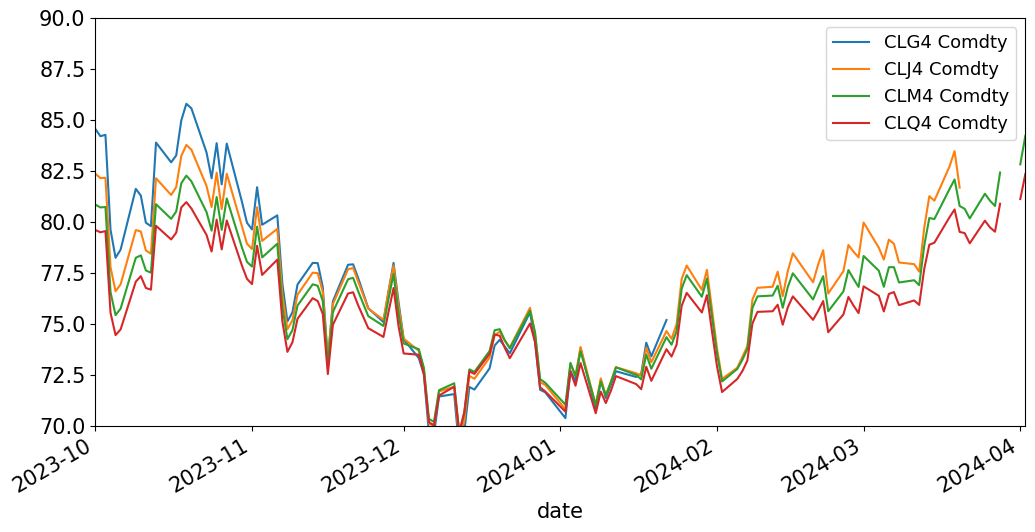

In [6]:
futures_ts.swaplevel(axis=1)['LAST_PRICE'].iloc[:,0:4].plot(xlim=('2023-10',DATEEND),ylim=(70,90));

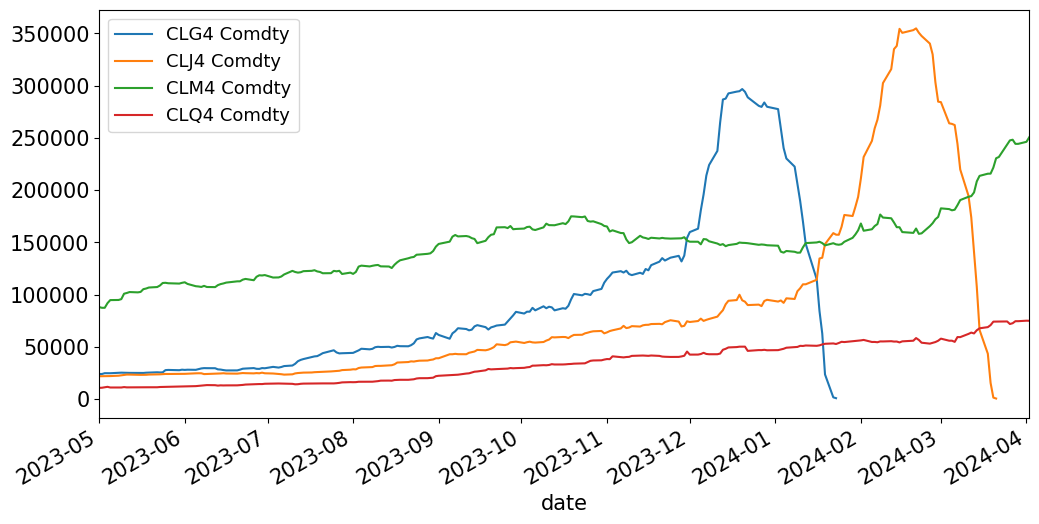

In [7]:
PLOTDATESTART = '2023-05-01'
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,0:4].plot(xlim=(PLOTDATESTART,DATEEND));

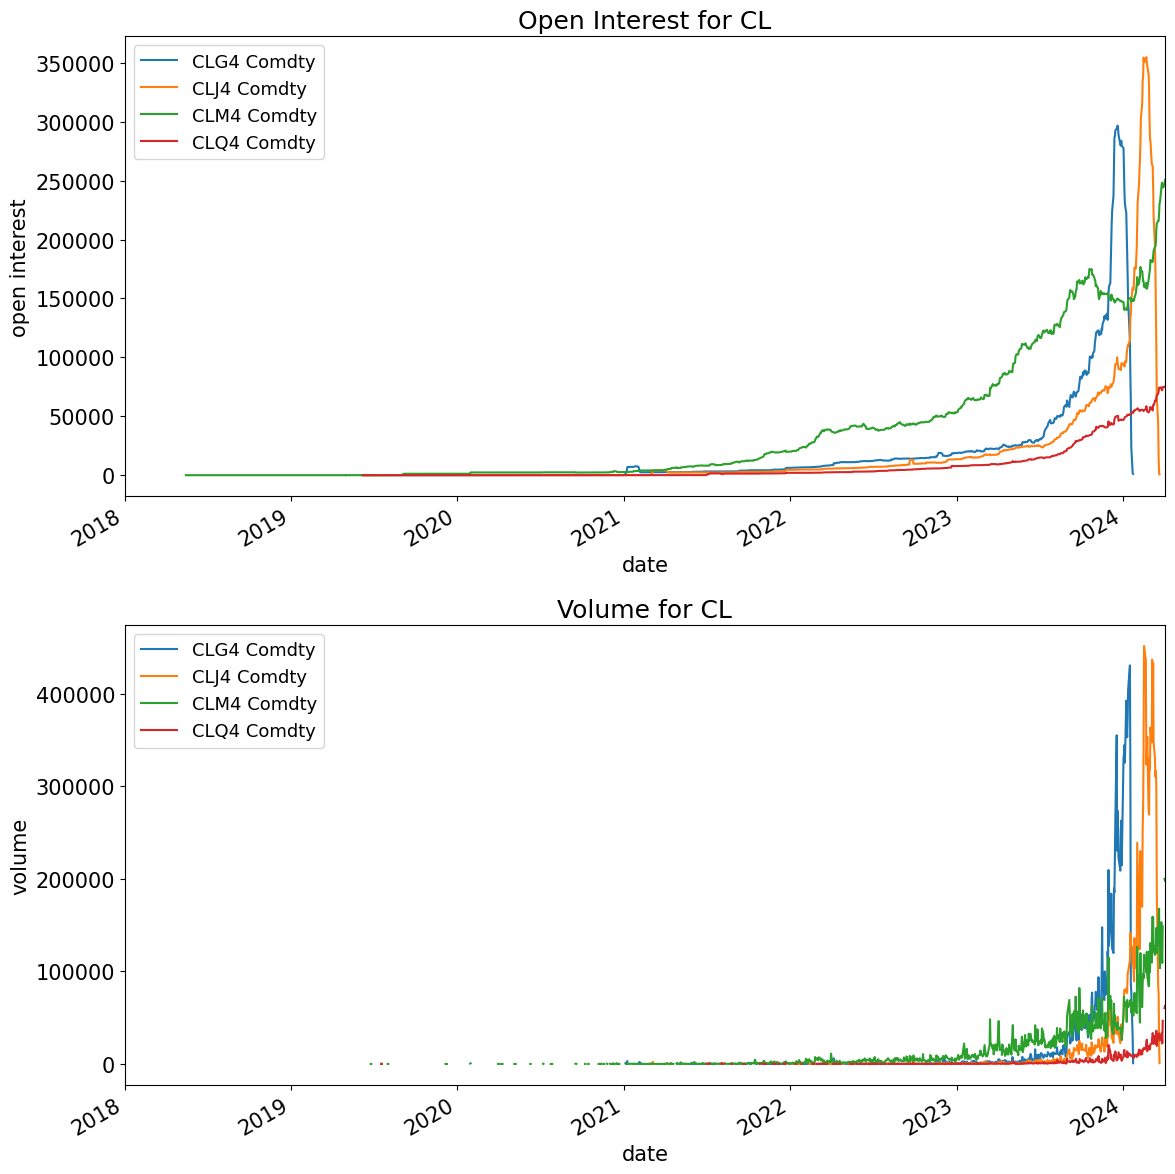

In [8]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,0:4].plot(ax=ax[0],xlim=(DATESTART,DATEEND),title=f'Open Interest for {TICKS[0]}',ylabel='open interest')
futures_ts.swaplevel(axis=1)['VOLUME'].iloc[:,0:4].plot(ax=ax[1],xlim=(DATESTART,DATEEND),title=f'Volume for {TICKS[0]}',ylabel='volume')
plt.tight_layout()
plt.show()

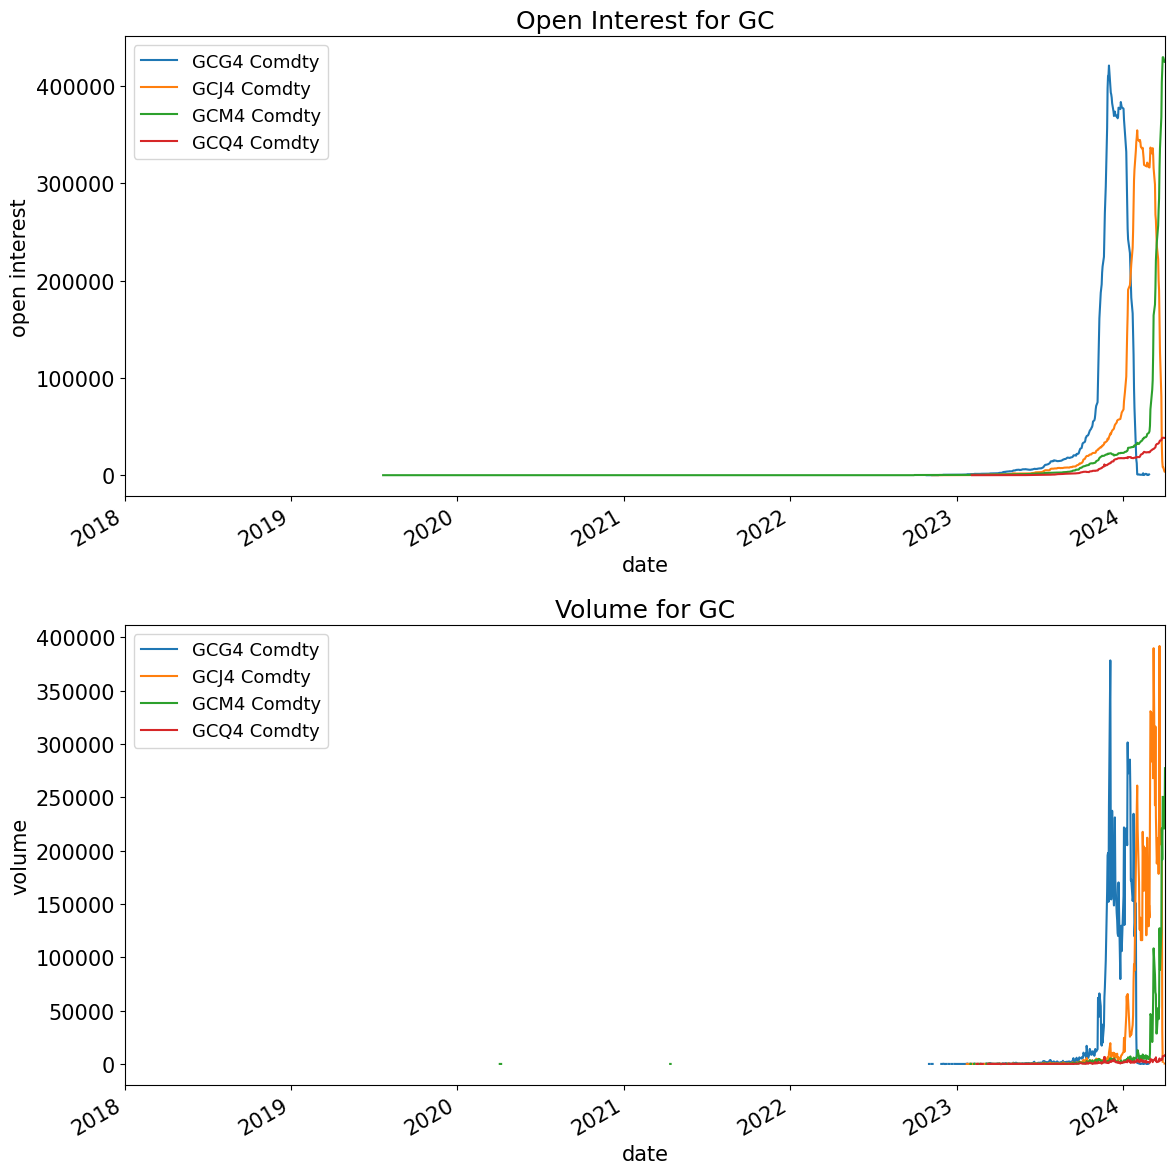

In [9]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,4:].plot(ax=ax[0],xlim=(DATESTART,DATEEND),title=f'Open Interest for {TICKS[1]}',ylabel='open interest')
futures_ts.swaplevel(axis=1)['VOLUME'].iloc[:,4:].plot(ax=ax[1],xlim=(DATESTART,DATEEND),title=f'Volume for {TICKS[1]}',ylabel='volume')
plt.tight_layout()
plt.show()

# Continuous Futures Adjustments

In [10]:
TICK = 'CL'
TYPE = 'Comdty'

ROLLS = ['B:00_0_R', 'B:00_0_D', 'B:00_0_W']
ROLLLABS = ['Ratio','Difference','Weighted Avg']

STARTDATE = '2010-01-01'
ENDDATE = DATEEND
FLDS = 'last_price'

In [11]:
bbticks_comp = [f'{TICK}1 {TYPE}', f'{TICK}2 {TYPE}']

for roll in ROLLS:
    bbticks_comp.append(f'{TICK}1 {roll} {TYPE}')
    
data_comp = blp.bdh(tickers=bbticks_comp, flds=FLDS, start_date=STARTDATE,
                     end_date=ENDDATE)

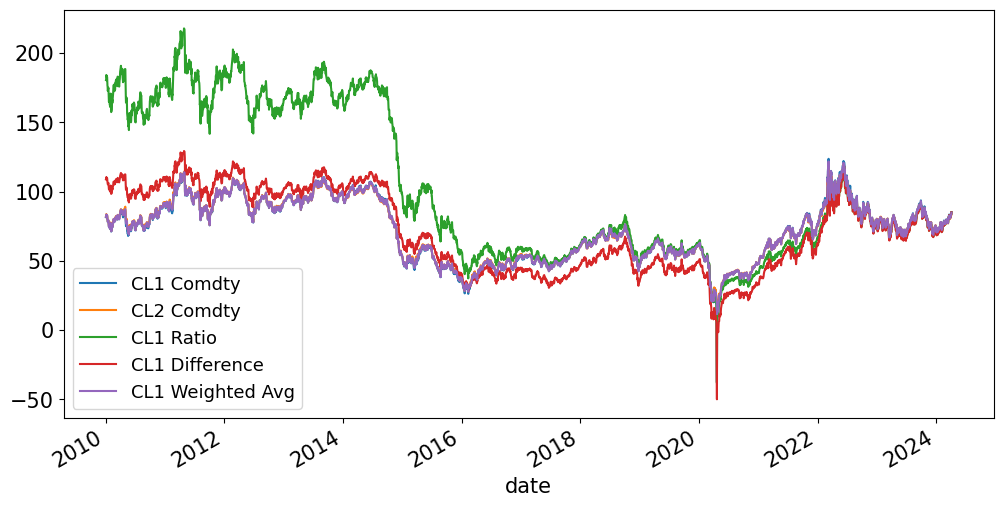

In [12]:
data_comp = data_comp.droplevel(level=1,axis=1)

data_comp.index = pd.to_datetime(data_comp.index)
data_comp.index.name = 'date'
data_comp.columns = [f'{TICK}1 {TYPE}', f'{TICK}2 {TYPE}'] + [f'{TICK}1 {rolllab}' for rolllab in ROLLLABS]

data_comp.plot();

In [13]:
px = data_comp.copy()
px[px<0] = np.nan
px[px==np.inf] = np.nan
rx = px.pct_change()
performanceMetrics(rx,annualization=252).style.format('{:.2%}')

/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_94284/3130540297.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rx = px.pct_change()


,Mean,Vol,Sharpe,Min,Max
CL1 Comdty,9.92%,43.31%,22.91%,-45.21%,37.66%
CL2 Comdty,9.78%,44.68%,21.88%,-43.37%,78.82%
CL1 Ratio,3.99%,42.31%,9.44%,-45.20%,25.08%
CL1 Difference,28.34%,101.62%,27.88%,-61.04%,315.00%
CL1 Weighted Avg,8.87%,41.13%,21.56%,-30.71%,24.37%


# Continuous Futures Data

In [14]:
STARTDATE = '2015-01-02'
ENDDATE = DATEEND

ADJ = 'B:00_0_R'
ADJLAB = 'roll=ratio'

bbcodes_adj = [f'{code}1 {ADJ} {TYPE}' for code in CODES]
bbcodes_adj += [f'{code}1 {ADJ} Index' for code in CODES_INDEX]
bbcodes_adj += [f'{code}1 Curncy' for code in CODES_CURNCY]

futures_hist = blp.bdh(bbcodes_adj,'PX_LAST',start_date=STARTDATE,end_date=ENDDATE)

In [15]:
futures_hist

,CL1 B:00_0_R Comdty,NG1 B:00_0_R Comdty,GC1 B:00_0_R Comdty,LA1 B:00_0_R Comdty,KC1 B:00_0_R Comdty,C 1 B:00_0_R Comdty,LC1 B:00_0_R Comdty,LH1 B:00_0_R Comdty,ES1 B:00_0_R Index,NK1 B:00_0_R Index,BP1 Curncy,BTC1 Curncy
,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2015-01-02,96.71,16.658,1471.56,2407.89,231.72,454.6875,191.676,126.915,2095.60,NaN,153.26,NaN
2015-01-05,91.84,15.987,1493.64,2385.05,241.86,466.4375,192.312,124.769,2064.62,14324.0,152.46,NaN
2015-01-06,87.97,16.298,1512.74,2342.68,251.64,465.3125,192.081,122.661,2042.60,13929.0,151.54,NaN
2015-01-07,89.29,15.926,1501.95,2348.97,251.86,455.2500,191.936,123.832,2068.20,13978.0,151.14,NaN
2015-01-08,89.55,16.237,1499.22,2407.23,254.52,452.9375,189.275,122.037,2104.56,14217.0,150.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,81.35,1.718,2211.35,2278.33,190.65,426.7500,178.886,91.939,5308.25,40430.0,126.37,68635.00
2024-03-28,83.17,1.763,2238.40,2320.98,188.85,442.0000,180.250,92.500,5308.50,40230.0,126.27,71296.17
2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40390.0,NaN,NaN


In [16]:
prices = futures_hist.droplevel(level=1,axis=1)
prices.columns = [col.split()[0] for col in prices.columns]
prices.index.name = 'date'

,CL1,NG1,GC1,LA1,KC1,C,LC1,LH1,ES1,NK1,BP1,BTC1
date,,,,,,,,,,,,
2015-01-02,96.71,16.658,1471.56,2407.89,231.72,454.6875,191.676,126.915,2095.60,NaN,153.26,NaN
2015-01-05,91.84,15.987,1493.64,2385.05,241.86,466.4375,192.312,124.769,2064.62,14324.0,152.46,NaN
2015-01-06,87.97,16.298,1512.74,2342.68,251.64,465.3125,192.081,122.661,2042.60,13929.0,151.54,NaN
2015-01-07,89.29,15.926,1501.95,2348.97,251.86,455.2500,191.936,123.832,2068.20,13978.0,151.14,NaN
2015-01-08,89.55,16.237,1499.22,2407.23,254.52,452.9375,189.275,122.037,2104.56,14217.0,150.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,81.35,1.718,2211.35,2278.33,190.65,426.7500,178.886,91.939,5308.25,40430.0,126.37,68635.00
2024-03-28,83.17,1.763,2238.40,2320.98,188.85,442.0000,180.250,92.500,5308.50,40230.0,126.27,71296.17
2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40390.0,NaN,NaN


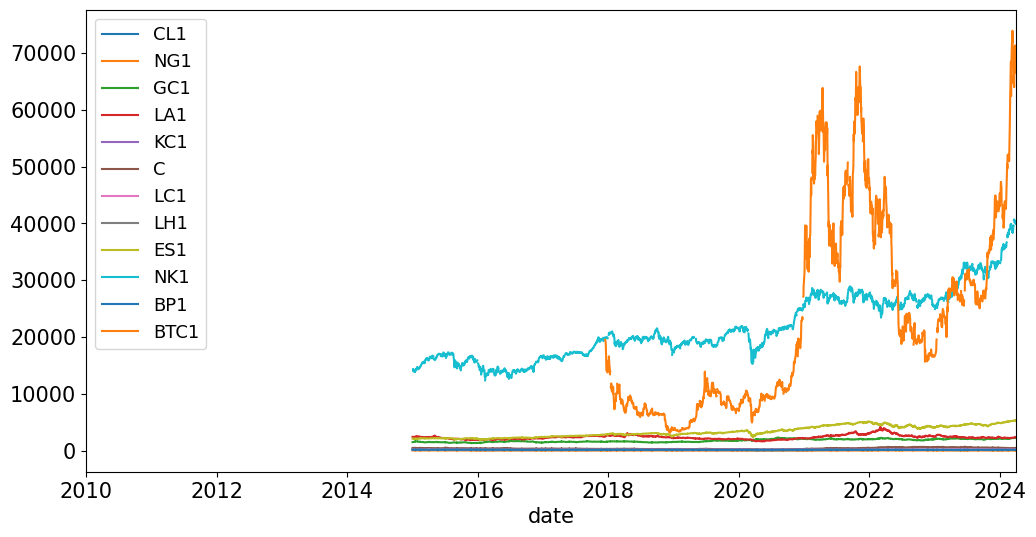

In [17]:
display(prices)
prices.plot(xlim=('2010',DATEEND));

# Futures Curves

In [18]:
bbtick_chain = ['CL1 Comdty','GC1 Comdty']
chain = blp.bds(bbtick_chain,'FUT_CHAIN')

pd_chain = chain.reset_index().set_index('security_description')
list_curves = pd_chain['index'].unique()

FLDS_CURVE = ['FUT_DLV_DT_FIRST','PX_LAST','OPEN_INT']

YRS = 3
SPARSE = 2


curves = dict()

for curve in list_curves:
    if curve == 'CL1 Comdty':
        bb_lookup = pd_chain[pd_chain['index']==curve].iloc[0:YRS*12:SPARSE].index
    elif curve == 'GC1 Comdty':
        bb_lookup = pd_chain[pd_chain['index']==curve].iloc[0:20:SPARSE].index

    curves[curve] = blp.bdp(bb_lookup,FLDS_CURVE).sort_values('fut_dlv_dt_first')
    curves[curve].rename(columns={'fut_dlv_dt_first':'delivery date','open_int':'open interest','px_last':'price'},inplace=True)
    curves[curve][['price','open interest']] = curves[curve][['price','open interest']].astype(float)
    curves[curve].index.name = 'ticker'    

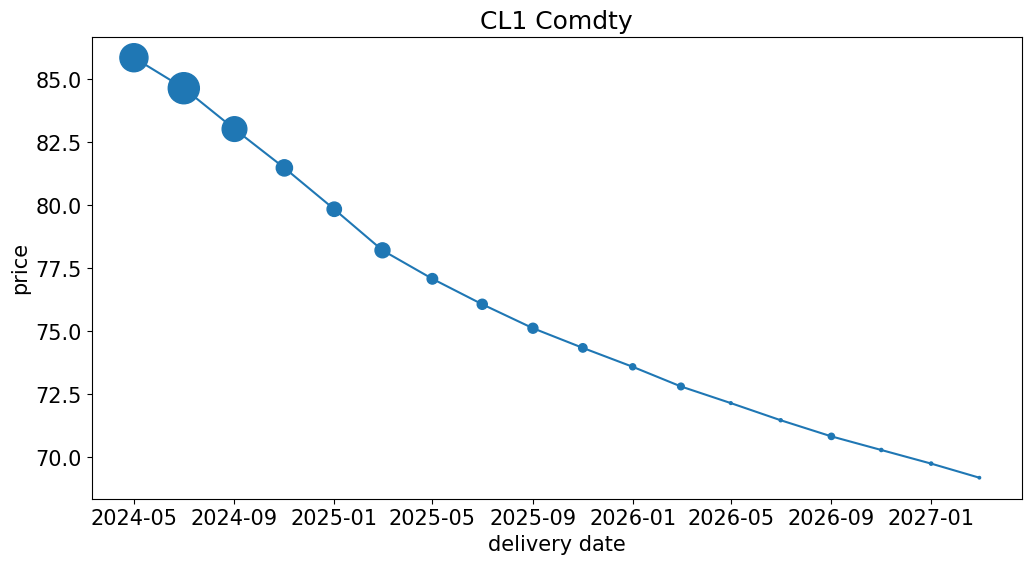

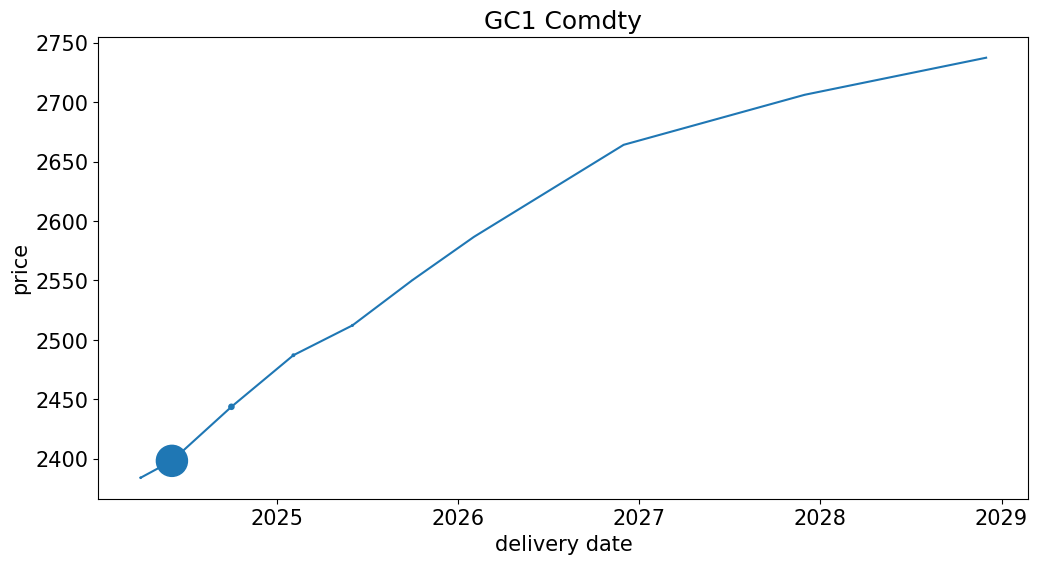

In [19]:
for comdty in list_curves:
    
    temp = curves[comdty].set_index('delivery date').sort_index()
    msize = (temp['open interest']/temp['open interest'].max()) * 500
    
    fig, ax=plt.subplots()
    temp['price'].plot(ax=ax,marker=None,title=comdty)
    temp.reset_index().plot.scatter('delivery date','price',s=msize,ax=ax,title=comdty)
    plt.show()

# Export Data

In [20]:
OUTFILE = f'../data/futures_data.xlsx'

with pd.ExcelWriter(OUTFILE) as writer:  

    futures_info.to_excel(writer, sheet_name= f'futures contracts', index=True)

    futures_ts.to_excel(writer, sheet_name= f'futures timeseries', index=True)    
    
    data_comp.to_excel(writer, sheet_name= f'roll conventions {TICK}', index=True)        
    
    prices.to_excel(writer, sheet_name= f'continuous futures {ADJLAB}', index=True)    
    
    for comdty in list_curves:
        temp = curves[comdty].sort_values('delivery date')
        temp.to_excel(writer, sheet_name= f'curve {comdty.split()[0]}', index=True)        